This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [88]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [89]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [90]:
train_labels[0]

1

In [91]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [92]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [93]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [94]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [95]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [96]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [97]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [98]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [99]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 178ms/step - accuracy: 0.6800 - loss: 0.6311 - val_accuracy: 0.8578 - val_loss: 0.4383
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8871 - loss: 0.3809 - val_accuracy: 0.8821 - val_loss: 0.3269
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9196 - loss: 0.2660 - val_accuracy: 0.8856 - val_loss: 0.2928
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9279 - loss: 0.2105 - val_accuracy: 0.8897 - val_loss: 0.2763
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9489 - loss: 0.1673 - val_accuracy: 0.8851 - val_loss: 0.2818
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9558 - loss: 0.1463 - val_accuracy: 0.8861 - val_loss: 0.2860
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9654 - loss: 0.1218 - val_accuracy: 0.8800 - val_loss: 0.3180
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9695 - loss: 0.1076 - val_accuracy: 0.8789 - val_

In [100]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

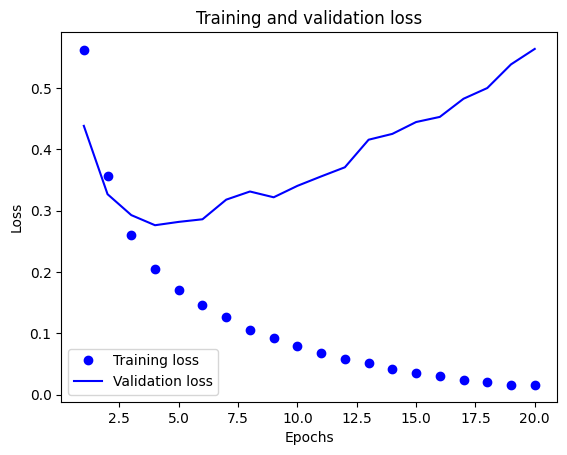

In [101]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

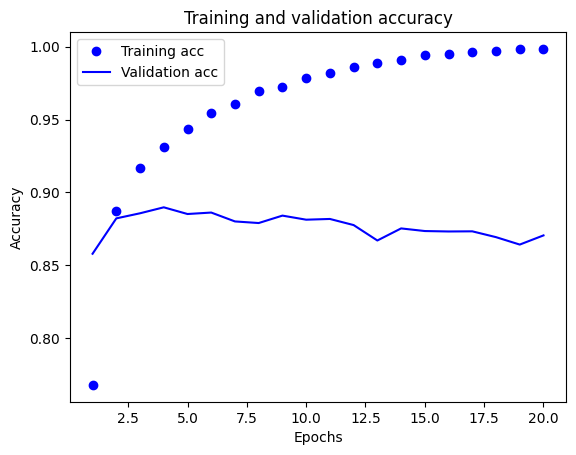

In [102]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [103]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_2hl_d16 = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7377 - loss: 0.5708
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9004 - loss: 0.2957
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9221 - loss: 0.2237
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9311 - loss: 0.1931
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8860 - loss: 0.2828


In [104]:
results_2hl_d16

[0.28082573413848877, 0.8872399926185608]

### Using a trained model to generate predictions on new data

In [105]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.20085302],
       [0.99982935],
       [0.8921694 ],
       ...,
       [0.09789411],
       [0.08139566],
       [0.5693128 ]], dtype=float32)

### Question 1: You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.

Creating a one hidden layer model 

In [106]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results_1hl = model.evaluate(x_test, y_test)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7209 - loss: 0.5765 - val_accuracy: 0.8616 - val_loss: 0.3927
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8994 - loss: 0.3327 - val_accuracy: 0.8825 - val_loss: 0.3202
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9187 - loss: 0.2573 - val_accuracy: 0.8870 - val_loss: 0.2961
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9331 - loss: 0.2157 - val_accuracy: 0.8897 - val_loss: 0.2815
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9439 - loss: 0.1830 - val_accuracy: 0.8879 - val_loss: 0.2756
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9529 - loss: 0.1606 - val_accuracy: 0.8804 - val_loss: 0.2910
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9579 - loss: 0.1475 - val_accuracy: 0.8844 - val_loss: 0.2812
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9598 - loss: 0.1325 - val_accuracy: 0.8863 - val_loss

Creating a three hidden layers model

In [107]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results_3hl = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6638 - loss: 0.6298 - val_accuracy: 0.8640 - val_loss: 0.4120
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8901 - loss: 0.3550 - val_accuracy: 0.8845 - val_loss: 0.3124
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9255 - loss: 0.2394 - val_accuracy: 0.8881 - val_loss: 0.2865
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9408 - loss: 0.1860 - val_accuracy: 0.8770 - val_loss: 0.3010
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9435 - loss: 0.1639 - val_accuracy: 0.8808 - val_loss: 0.2964
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9637 - loss: 0.1228 - val_accuracy: 0.8781 - val_loss: 0.3127
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9685 - loss: 0.1046 - val_accuracy: 0.8855 - val_loss: 0.3088
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9781 - loss: 0.0838 - val_accuracy: 0.8799 - val_los

Results from one, two, and three hidden layers

In [108]:
print(f"Results with one hidden layers: {results_1hl}\nResults with two hidden layers: {results_2hl_d16}\nResults with three hidden layers: {results_3hl}")

Results with one hidden layers: [0.42816391587257385, 0.8582800030708313]
Results with two hidden layers: [0.28082573413848877, 0.8872399926185608]
Results with three hidden layers: [0.6787039637565613, 0.8572800159454346]


### Question 2: Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.

32 Units

In [109]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results_d32 = model.evaluate(x_test, y_test)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6904 - loss: 0.5955 - val_accuracy: 0.7566 - val_loss: 0.4955
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8778 - loss: 0.3394 - val_accuracy: 0.8809 - val_loss: 0.3051
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9280 - loss: 0.2228 - val_accuracy: 0.8809 - val_loss: 0.2943
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9418 - loss: 0.1809 - val_accuracy: 0.8764 - val_loss: 0.3151
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9457 - loss: 0.1577 - val_accuracy: 0.8848 - val_loss: 0.2817
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9599 - loss: 0.1281 - val_accuracy: 0.8827 - val_loss: 0.2971
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9690 - loss: 0.1050 - val_accuracy: 0.8767 - val_loss: 0.3231
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9702 - loss: 0.0944 - val_accuracy: 0.8826 - v

64 Units

In [110]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results_d64 = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.6440 - loss: 0.6137 - val_accuracy: 0.8386 - val_loss: 0.3838
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8788 - loss: 0.3263 - val_accuracy: 0.8305 - val_loss: 0.3967
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9070 - loss: 0.2400 - val_accuracy: 0.8763 - val_loss: 0.3128
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9336 - loss: 0.1824 - val_accuracy: 0.8675 - val_loss: 0.3320
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9446 - loss: 0.1552 - val_accuracy: 0.8855 - val_loss: 0.2897
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9608 - loss: 0.1200 - val_accuracy: 0.8578 - val_loss: 0.4274
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9555 - loss: 0.1154 - val_accuracy: 0.8668 - val_loss: 0.4312
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9710 - loss: 0.0833 - val_accuracy: 0.8838 - v

Results

In [111]:
print(f"Results with 16 hidden units: {results_2hl_d16}\nResults with 32 hidden units: {results_d32}\nResults with 64 hidden units: {results_d64}")

Results with 16 hidden units: [0.28082573413848877, 0.8872399926185608]
Results with 32 hidden units: [0.6283676624298096, 0.8596000075340271]
Results with 64 hidden units: [0.6555571556091309, 0.8663600087165833]


### Question 3: Try using the mse loss function instead of binary_crossentropy.

In [112]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="mse",  # MSE instead of binary_crossentropy
              metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results_mse = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6760 - loss: 0.2117 - val_accuracy: 0.8517 - val_loss: 0.1330
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8855 - loss: 0.1106 - val_accuracy: 0.8825 - val_loss: 0.0998
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9218 - loss: 0.0768 - val_accuracy: 0.8870 - val_loss: 0.0898
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9315 - loss: 0.0635 - val_accuracy: 0.8888 - val_loss: 0.0848
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9441 - loss: 0.0532 - val_accuracy: 0.8885 - val_loss: 0.0836
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9504 - loss: 0.0473 - val_accuracy: 0.8849 - val_loss: 0.0835
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9563 - loss: 0.0410 - val_accuracy: 0.8860 - val_loss: 0.0835
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9623 - loss: 0.0368 - val_accuracy: 0.8799 - val_los

Results

In [113]:
print(f"Results with binary crossentropy loss: {results_2hl_d16}\nResults with MSE loss: {results_mse}")

Results with binary crossentropy loss: [0.28082573413848877, 0.8872399926185608]
Results with MSE loss: [0.1053418293595314, 0.8641200065612793]


### Question 4: Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.

In [114]:
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results_tahn = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7114 - loss: 0.5777 - val_accuracy: 0.8607 - val_loss: 0.3789
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8953 - loss: 0.3186 - val_accuracy: 0.8813 - val_loss: 0.3000
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9247 - loss: 0.2225 - val_accuracy: 0.8820 - val_loss: 0.2844
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9462 - loss: 0.1639 - val_accuracy: 0.8872 - val_loss: 0.2768
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9562 - loss: 0.1325 - val_accuracy: 0.8741 - val_loss: 0.3334
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9696 - loss: 0.1000 - val_accuracy: 0.8845 - val_loss: 0.3137
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9738 - loss: 0.0896 - val_accuracy: 0.8718 - val_loss: 0.3625
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9782 - loss: 0.0744 - val_accuracy: 0.8752 - val_lo

Results

In [115]:
print(f"Results with relu: {results_2hl_d16}\nResults with tahn activation: {results_tahn}")

Results with relu: [0.28082573413848877, 0.8872399926185608]
Results with tahn activation: [0.7454037666320801, 0.8551999926567078]


### Question 5: Use any technique we studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation.

L2 Regularization

In [116]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results_l2r = model.evaluate(x_test, y_test)
print(f"Results with L2 regularization: {results_l2r}")


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7038 - loss: 0.6383 - val_accuracy: 0.8515 - val_loss: 0.4493
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8860 - loss: 0.3905 - val_accuracy: 0.8769 - val_loss: 0.3681
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9162 - loss: 0.3033 - val_accuracy: 0.8801 - val_loss: 0.3466
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9307 - loss: 0.2597 - val_accuracy: 0.8883 - val_loss: 0.3284
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9421 - loss: 0.2284 - val_accuracy: 0.8858 - val_loss: 0.3339
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9493 - loss: 0.2093 - val_accuracy: 0.8843 - val_loss: 0.3347
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9571 - loss: 0.1931 - val_accuracy: 0.8818 - val_loss: 0.3422
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9592 - loss: 0.1857 - val_accuracy: 0.8737 - val_los

Dropout

In [117]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results_dropout = model.evaluate(x_test, y_test)
print(f"Test Accuracy with Dropout: {results_dropout}")

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5720 - loss: 0.6703 - val_accuracy: 0.8340 - val_loss: 0.5372
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7374 - loss: 0.5482 - val_accuracy: 0.8679 - val_loss: 0.4182
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8164 - loss: 0.4437 - val_accuracy: 0.8782 - val_loss: 0.3473
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8544 - loss: 0.3724 - val_accuracy: 0.8860 - val_loss: 0.2996
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8816 - loss: 0.3203 - val_accuracy: 0.8857 - val_loss: 0.2847
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9028 - loss: 0.2777 - val_accuracy: 0.8891 - val_loss: 0.2723
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9143 - loss: 0.2482 - val_accuracy: 0.8884 - val_loss: 0.2712
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9246 - loss: 0.2184 - val_accuracy: 0.8876 - va